In [55]:
from keras.layers import *
from keras.models import Sequential
import matplotlib.pyplot as plt


In [ ]:
#Dataset
from keras.datasets import cifar100
from keras.utils import to_categorical
(XTrain,YTrain),(XTest,YTest) = cifar100.load_data(label_mode='coarse')

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


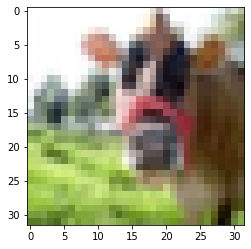

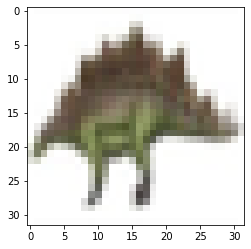

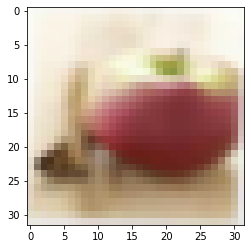

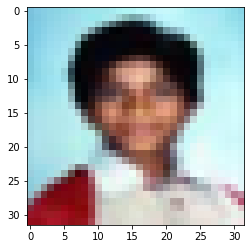

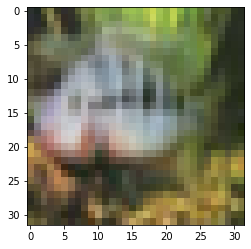

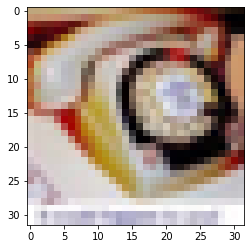

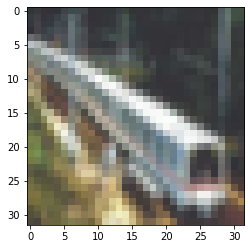

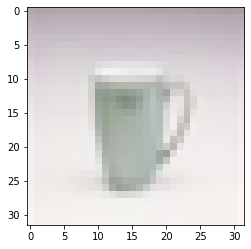

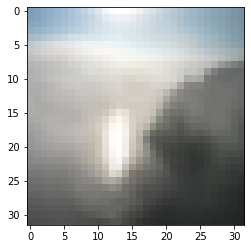

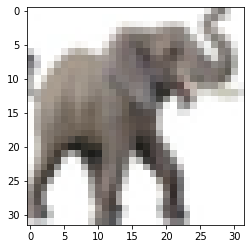

In [ ]:
# example of loading the mnist dataset

# summarize loaded dataset
print('Train: X=%s, y=%s' % (XTrain.shape, YTrain.shape))
print('Test: X=%s, y=%s' % (XTest.shape, YTest.shape))
# plot first few images
for i in range(10):
    plt.imshow(XTrain[i].reshape(32,32,3))
    plt.show()
plt.show()

In [ ]:
# Build a Model 

model = Sequential()
model.add(Conv2D(128,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(Dropout(0.25))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(256,(3,3),activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPool2D((2,2)))


model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(1024,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(20,activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 30, 30, 128)       3584      
_________________________________________________________________
dropout_22 (Dropout)         (None, 30, 30, 128)       0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 13, 13, 256)       295168    
_________________________________________________________________
dropout_23 (Dropout)         (None, 13, 13, 256)       0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 6, 6, 256)         0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 4, 4, 128)        

In [ ]:
def preprocess_data(X,Y):
    X = X.reshape((-1,32,32,3))
    X = X/255.0
    Y = to_categorical(Y)
    return X,Y

XTrain,YTrain = preprocess_data(XTrain,YTrain)
print(XTrain.shape,YTrain.shape)

XTest,YTest = preprocess_data(XTest,YTest)
print(XTest.shape,YTest.shape)

(50000, 32, 32, 3) (50000, 20)
(10000, 32, 32, 3) (10000, 20)


In [54]:
# Model Compilation
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
hist = model.fit(XTrain,YTrain,epochs=20,validation_split=0.1,batch_size=128)

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
45000/45000 [==============================] - 473s 11ms/step - loss: 2.6085 - accuracy: 0.1890 - val_loss: 2.4929 - val_accuracy: 0.2546
Epoch 2/20
45000/45000 [==============================] - 472s 10ms/step - loss: 2.2280 - accuracy: 0.3087 - val_loss: 2.2606 - val_accuracy: 0.3066
Epoch 3/20
45000/45000 [==============================] - 471s 10ms/step - loss: 2.0127 - accuracy: 0.3740 - val_loss: 1.9995 - val_accuracy: 0.3956
Epoch 4/20
45000/45000 [==============================] - 473s 11ms/step - loss: 1.8539 - accuracy: 0.4260 - val_loss: 1.9678 - val_accuracy: 0.4076
Epoch 5/20
45000/45000 [==============================] - 482s 11ms/step - loss: 1.7261 - accuracy: 0.4620 - val_loss: 1.8311 - val_accuracy: 0.4450
Epoch 6/20
45000/45000 [==============================] - 476s 11ms/step - loss: 1.6094 - accuracy: 0.4961 - val_loss: 1.7622 - val_accuracy: 0.4652
Epoch 7/20
45000/45000 [==============================] -

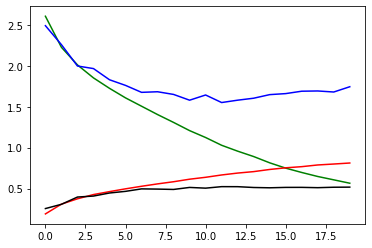

In [56]:
plt.figure(0)
plt.plot(hist.history['loss'],'g')
plt.plot(hist.history['val_loss'],'b')
plt.plot(hist.history['accuracy'],'r')
plt.plot(hist.history['val_accuracy'],'black')
plt.show()

In [57]:
model.evaluate(XTest,YTest)

10000/10000 [==============================] - 25s 2ms/step


[1.7399516017913819, 0.5120000243186951]